In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import itertools

from matplotlib.ticker import NullFormatter

import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Data exploration

In [2]:
df = pd.read_excel("creditcardmarketing_clean.xlsx")

In [3]:
df

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [4]:
df.columns

Index(['Customer Number', 'Offer Accepted', 'Reward', 'Mailer Type',
       'Income Level', '# Bank Accounts Open', 'Overdraft Protection',
       'Credit Rating', '# Credit Cards Held', '# Homes Owned',
       'Household Size', 'Own Your Home', 'Average Balance', 'Q1 Balance',
       'Q2 Balance', 'Q3 Balance', 'Q4 Balance'],
      dtype='object')

In [5]:
# Clearly we're not gonna use the customer number. 
df.drop('Customer Number', axis=1, inplace=True)

In [6]:
df

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [7]:
df.describe()

,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [8]:
df.dtypes

Offer Accepted           object
Reward                   object
Mailer Type              object
Income Level             object
# Bank Accounts Open      int64
Overdraft Protection     object
Credit Rating            object
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home            object
Average Balance         float64
Q1 Balance              float64
Q2 Balance              float64
Q3 Balance              float64
Q4 Balance              float64
dtype: object

In [9]:
df_numeric = df._get_numeric_data()

In [10]:
df_numeric

,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...
17995,1,1,1,5,167.50,136.0,65.0,71.0,398.0
17996,1,3,1,3,850.50,984.0,940.0,943.0,535.0
17997,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0
17998,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0


In [11]:
cols = df.columns
num_cols = df._get_numeric_data().columns

In [12]:
cat_cols = list(set(cols) - set(num_cols))

In [13]:
df_categorical = df[cat_cols]

In [14]:
df_categorical

,Overdraft Protection,Credit Rating,Reward,Offer Accepted,Own Your Home,Mailer Type,Income Level
0,No,High,Air Miles,No,No,Letter,High
1,No,Medium,Air Miles,No,Yes,Letter,Medium
2,No,Medium,Air Miles,No,Yes,Postcard,High
3,No,High,Air Miles,No,No,Letter,Medium
4,No,Medium,Air Miles,No,Yes,Letter,Medium
...,...,...,...,...,...,...,...
17995,No,Low,Cash Back,No,Yes,Letter,High
17996,No,Low,Cash Back,No,Yes,Letter,High
17997,No,Low,Cash Back,No,No,Letter,High
17998,No,Medium,Cash Back,No,Yes,Letter,Medium


# Numerical columns

In [15]:
# Now let's explore the dataframes separately, to check correlations with our target value
df_numeric['offer']= df_categorical['Offer Accepted'].copy()

In [16]:
df_numeric

,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,offer
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,No
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0,No
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0,No
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,No
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,No
...,...,...,...,...,...,...,...,...,...,...
17995,1,1,1,5,167.50,136.0,65.0,71.0,398.0,No
17996,1,3,1,3,850.50,984.0,940.0,943.0,535.0,No
17997,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0,No
17998,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0,No


In [17]:
df_numeric.offer.value_counts()

No     16977
Yes     1023
Name: offer, dtype: int64

In [18]:
df_numeric.offer = pd.get_dummies(df_numeric.offer)

In [19]:
df_numeric.offer.value_counts()

1    16977
0     1023
Name: offer, dtype: int64

In [20]:
df_numeric.corr()

,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,offer
# Bank Accounts Open,1.000000,-0.001728,0.004772,0.008479,-0.003909,-0.002814,-0.007956,0.000190,-0.000356,0.000843
# Credit Cards Held,-0.001728,1.000000,-0.002547,-0.003074,-0.003469,-0.009446,-0.007373,-0.007623,0.015362,0.002192
# Homes Owned,0.004772,-0.002547,1.000000,0.005304,0.017967,0.013143,0.009758,0.007775,0.014775,0.000631
Household Size,0.008479,-0.003074,0.005304,1.000000,-0.003582,-0.005080,-0.008766,0.003633,0.000232,0.012822
Average Balance,-0.003909,-0.003469,0.017967,-0.003582,1.000000,0.481507,0.800285,0.752741,0.572380,0.003878
Q1 Balance,-0.002814,-0.009446,0.013143,-0.005080,0.481507,1.000000,0.483134,-0.060961,-0.237283,0.016535
Q2 Balance,-0.007956,-0.007373,0.009758,-0.008766,0.800285,0.483134,1.000000,0.487710,0.168955,0.000310
Q3 Balance,0.000190,-0.007623,0.007775,0.003633,0.752741,-0.060961,0.487710,1.000000,0.565298,-0.008378
Q4 Balance,-0.000356,0.015362,0.014775,0.000232,0.572380,-0.237283,0.168955,0.565298,1.000000,-0.000580
offer,0.000843,0.002192,0.000631,0.012822,0.003878,0.016535,0.000310,-0.008378,-0.000580,1.000000


In [21]:
df_numeric.isna().sum()

# Bank Accounts Open     0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
offer                    0
dtype: int64

In [22]:
df_numeric.isnull().sum()

# Bank Accounts Open     0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
offer                    0
dtype: int64

In [23]:
df_numeric.dropna(axis=0, inplace= True)

In [24]:
df_numeric.isnull().sum()

# Bank Accounts Open    0
# Credit Cards Held     0
# Homes Owned           0
Household Size          0
Average Balance         0
Q1 Balance              0
Q2 Balance              0
Q3 Balance              0
Q4 Balance              0
offer                   0
dtype: int64

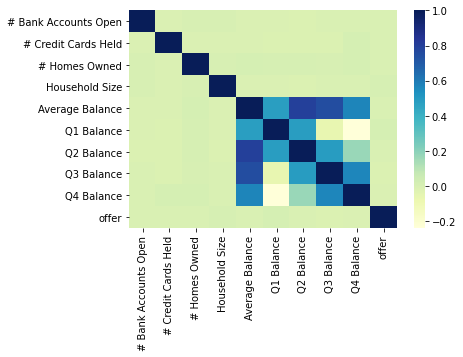

In [25]:
import seaborn as sns
sns.heatmap(df_numeric.corr(), fmt='.1g',cmap="YlGnBu")

In [26]:
df_numeric.columns

Index(['# Bank Accounts Open', '# Credit Cards Held', '# Homes Owned',
       'Household Size', 'Average Balance', 'Q1 Balance', 'Q2 Balance',
       'Q3 Balance', 'Q4 Balance', 'offer'],
      dtype='object')

In [27]:
to_drop = ['Average Balance', 'Q2 Balance','Q3 Balance', 'Q4 Balance',]
df_numeric.drop(to_drop, axis = 1, inplace = True)

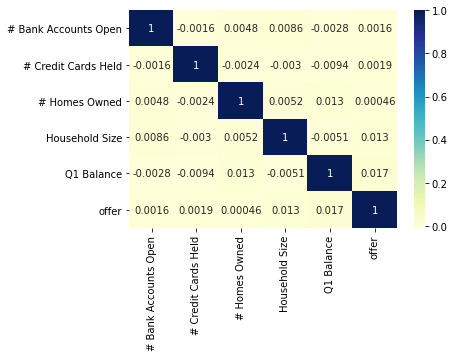

In [28]:
sns.heatmap(df_numeric.corr(), fmt='.2g', cmap="YlGnBu", annot=True)

In [29]:
from matplotlib.colors import BASE_COLORS

In [30]:
def df_hist(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col], color = list(BASE_COLORS.keys())[i])
        
    plt.show()

In [31]:
def df_bar(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts())
        
    plt.show()

/Users/andressaldana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/andressaldana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/andressaldana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


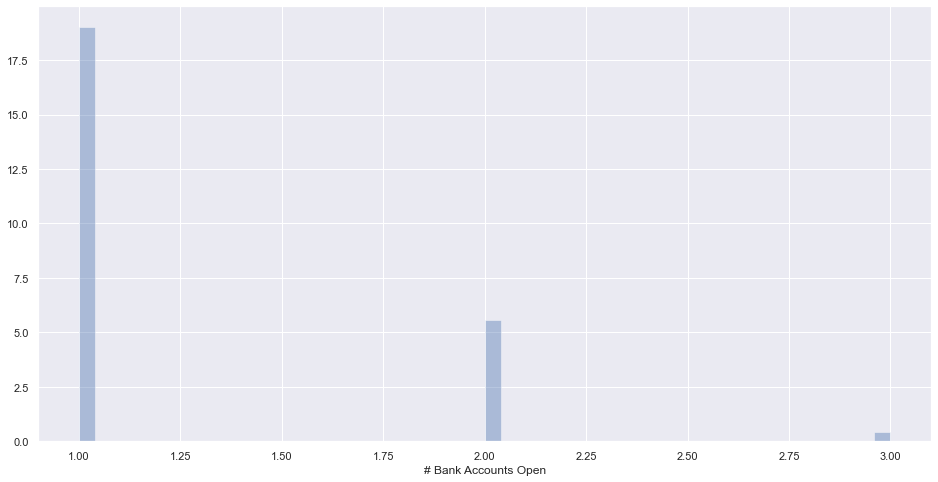

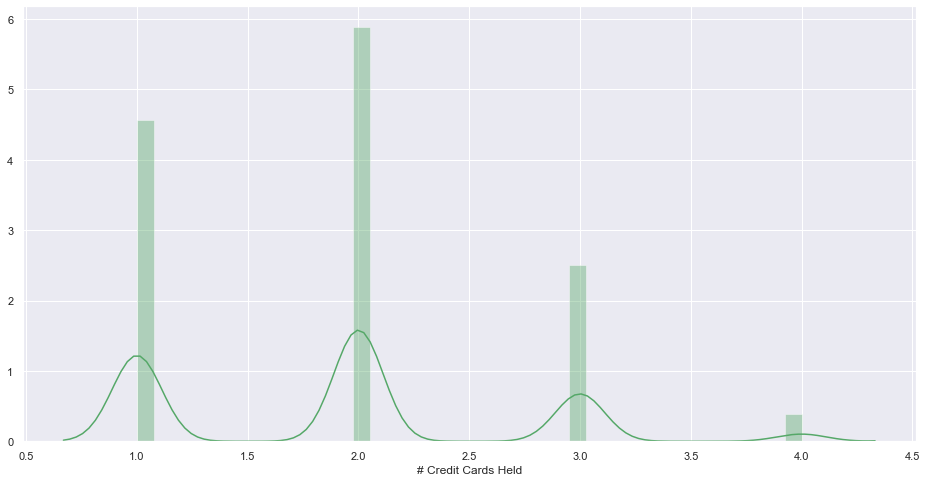

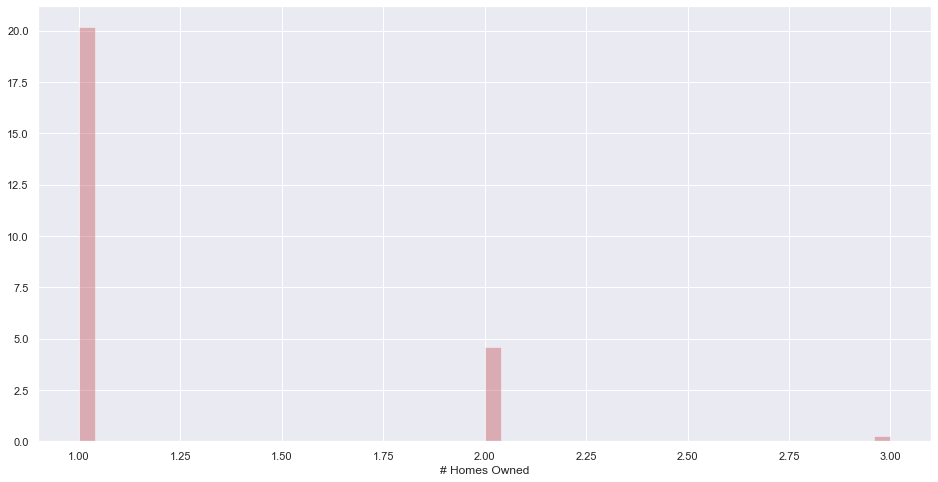

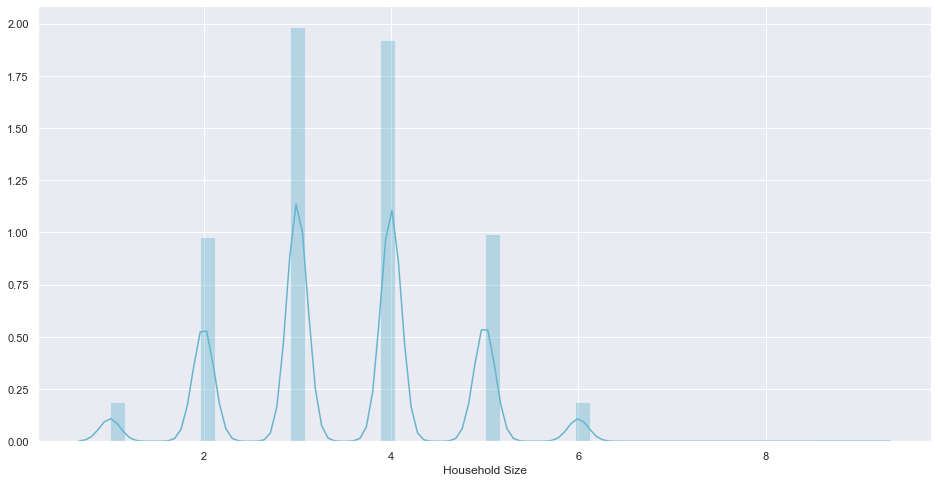

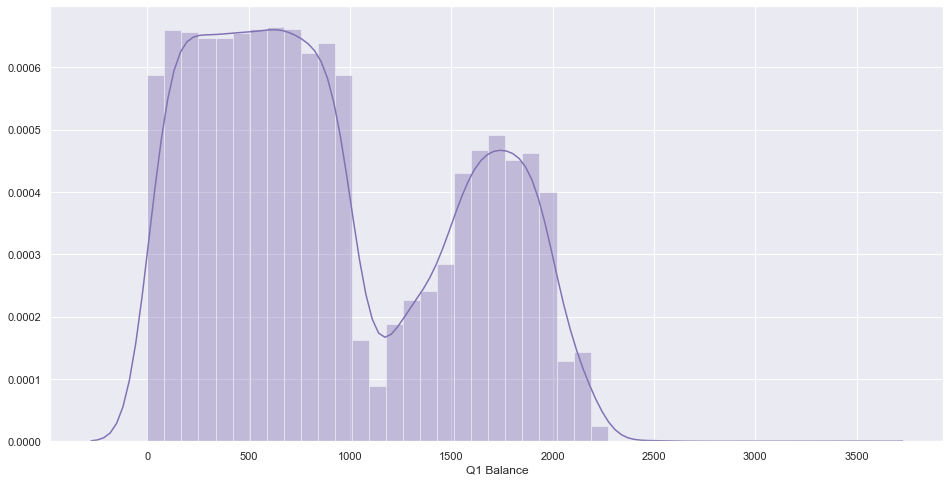

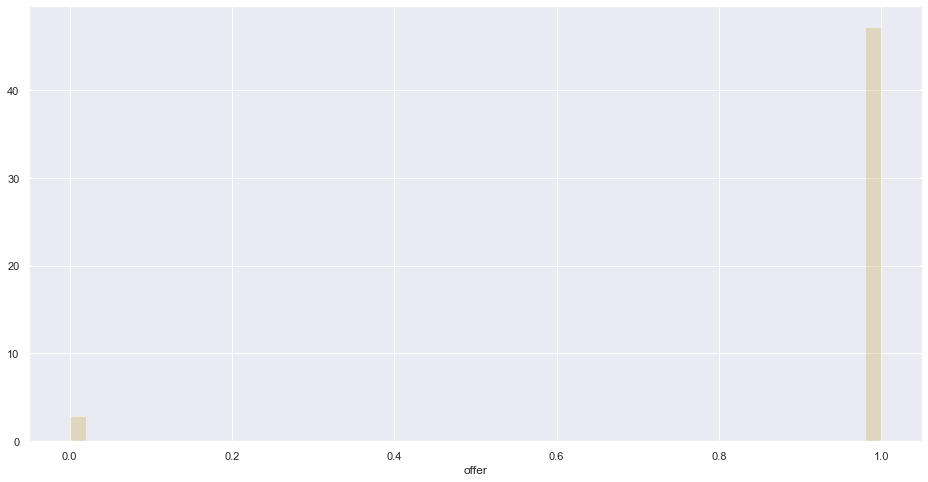

In [32]:
df_hist(df_numeric)

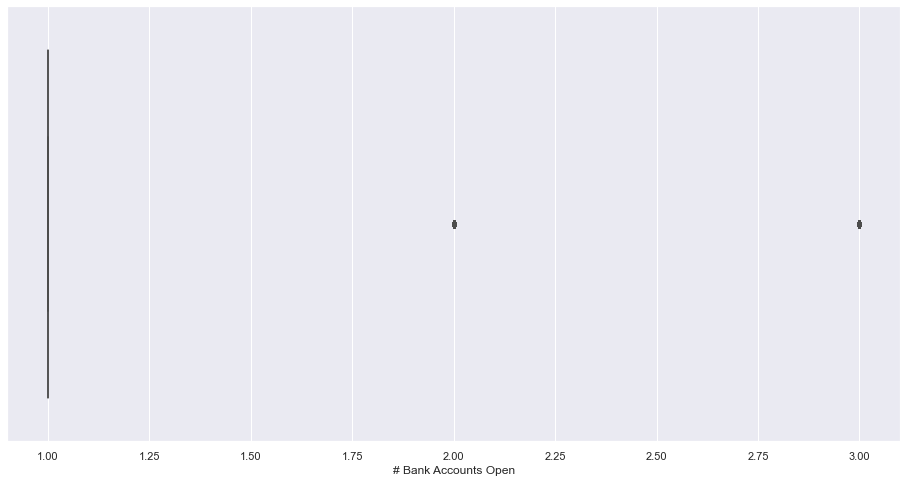

1st Quartile:  1.0  3rd Quartile:  1.0


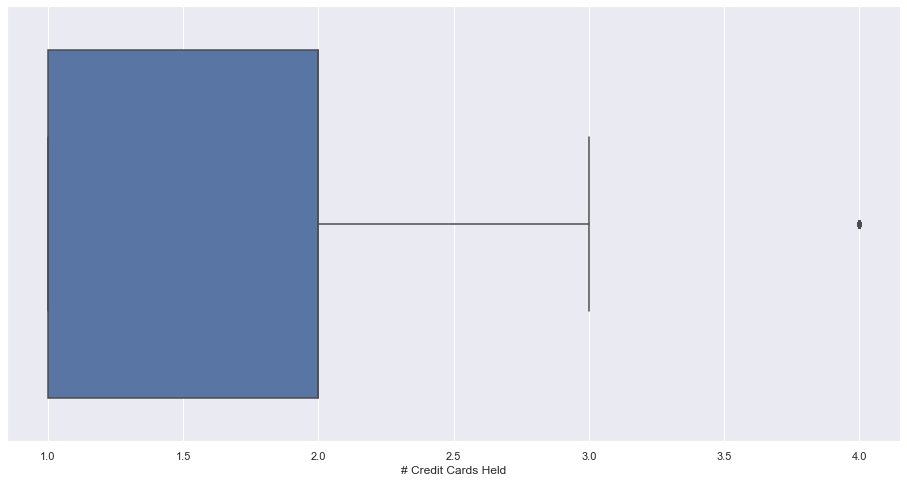

1st Quartile:  1.0  3rd Quartile:  2.0


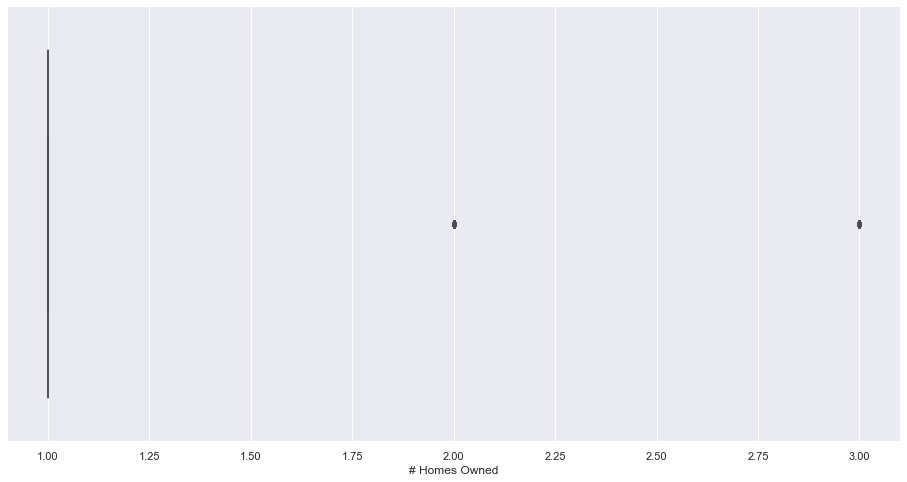

1st Quartile:  1.0  3rd Quartile:  1.0


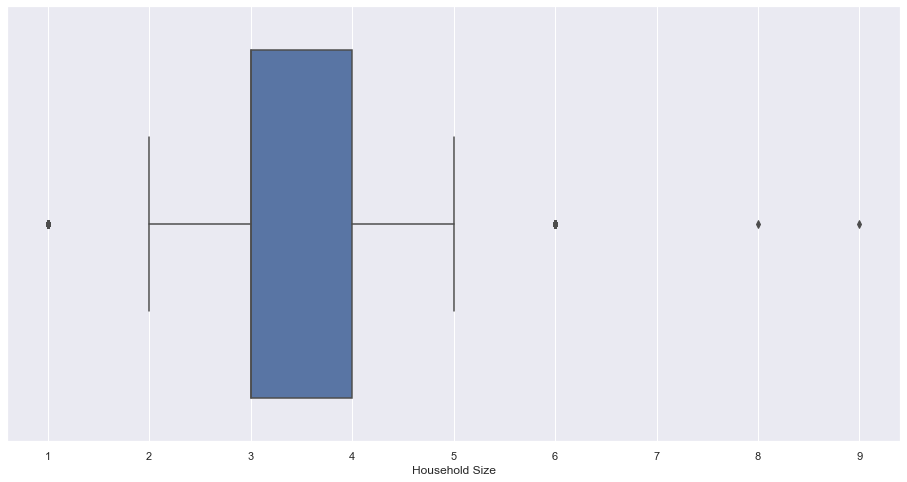

1st Quartile:  3.0  3rd Quartile:  4.0


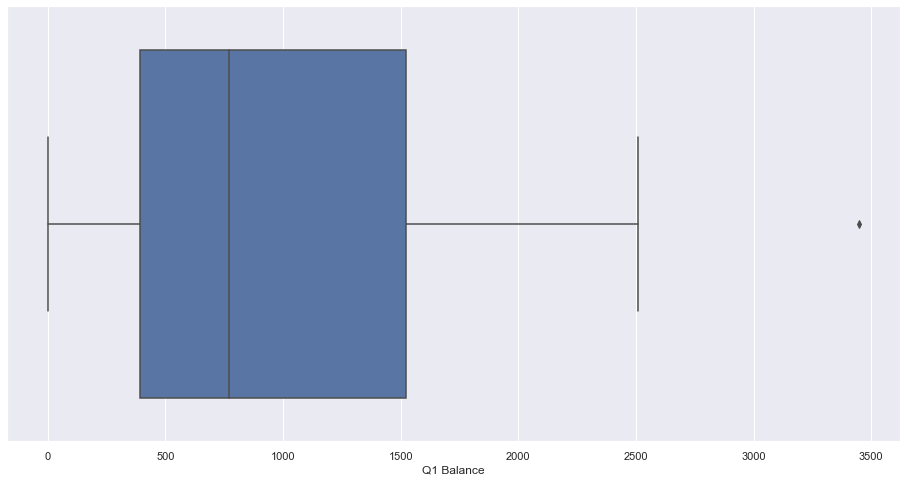

1st Quartile:  392.75  3rd Quartile:  1521.0


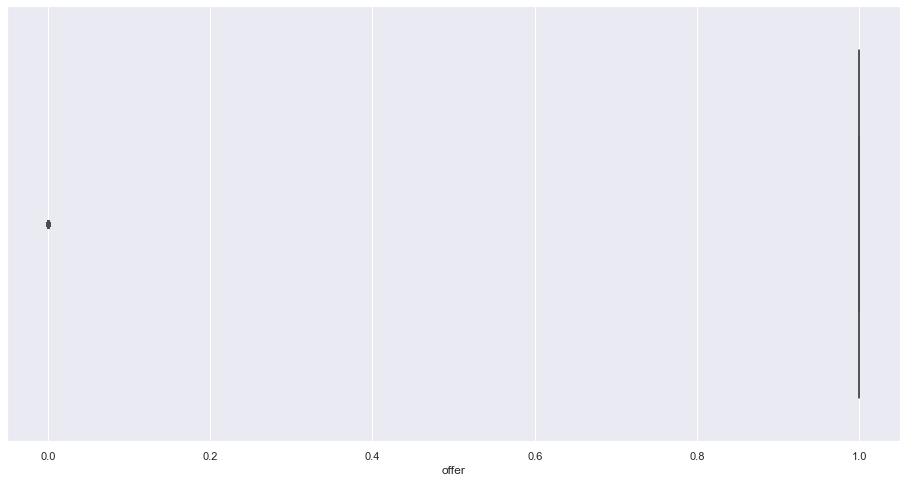

1st Quartile:  1.0  3rd Quartile:  1.0


In [33]:
for col in df_numeric: # Visualizing Outliers
    sns.boxplot(x = df_numeric[col])
    
    Q1 = df_numeric[col].quantile(0.25)
    Q3 = df_numeric[col].quantile(0.75)
    #Calculating Quartiles of that column
    
    plt.show()
    print("1st Quartile: ", Q1, " 3rd Quartile: ", Q3)

# Categorical columns

In [34]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

In [35]:
cat_onehot = encoder.fit_transform(df_categorical)

In [36]:
cat_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [37]:
cat_onehot.shape

(18000, 10)

In [38]:
encoder.get_feature_names()

array(['x0_Yes', 'x1_Low', 'x1_Medium', 'x2_Cash Back', 'x2_Points',
       'x3_Yes', 'x4_Yes', 'x5_Postcard', 'x6_Low', 'x6_Medium'],
      dtype=object)

In [39]:
df_cat_enco = pd.DataFrame( data=cat_onehot, columns = encoder.get_feature_names())

In [42]:
to_drop = ['x6_Low', 'x2_Points','x1_Medium','x3_Yes',]

In [43]:
df_cat_enco.drop(to_drop, axis = 1, inplace = True)

In [44]:
df_cat_enco

,x0_Yes,x1_Low,x2_Cash Back,x4_Yes,x5_Postcard,x6_Medium
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
17995,0.0,1.0,1.0,1.0,0.0,0.0
17996,0.0,1.0,1.0,1.0,0.0,0.0
17997,0.0,1.0,1.0,0.0,0.0,0.0
17998,0.0,0.0,1.0,1.0,0.0,1.0


In [45]:
df_categorical

,Overdraft Protection,Credit Rating,Reward,Offer Accepted,Own Your Home,Mailer Type,Income Level
0,No,High,Air Miles,No,No,Letter,High
1,No,Medium,Air Miles,No,Yes,Letter,Medium
2,No,Medium,Air Miles,No,Yes,Postcard,High
3,No,High,Air Miles,No,No,Letter,Medium
4,No,Medium,Air Miles,No,Yes,Letter,Medium
...,...,...,...,...,...,...,...
17995,No,Low,Cash Back,No,Yes,Letter,High
17996,No,Low,Cash Back,No,Yes,Letter,High
17997,No,Low,Cash Back,No,No,Letter,High
17998,No,Medium,Cash Back,No,Yes,Letter,Medium


In [46]:
import seaborn as sns

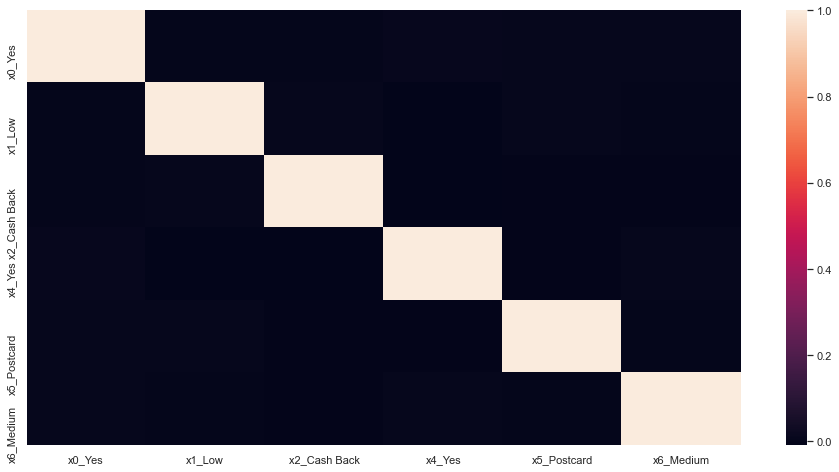

In [47]:
sns.heatmap(df_cat_enco.corr(), fmt='.1g')

In [48]:
df_cat_enco.corr()

,x0_Yes,x1_Low,x2_Cash Back,x4_Yes,x5_Postcard,x6_Medium
x0_Yes,1.000000,-0.001748,0.000491,0.008168,0.002851,0.004079
x1_Low,-0.001748,1.000000,0.005176,-0.006464,0.003271,0.000755
x2_Cash Back,0.000491,0.005176,1.000000,-0.009708,-0.003888,-0.002318
x4_Yes,0.008168,-0.006464,-0.009708,1.000000,-0.004346,0.004205
x5_Postcard,0.002851,0.003271,-0.003888,-0.004346,1.000000,0.001088
x6_Medium,0.004079,0.000755,-0.002318,0.004205,0.001088,1.000000


In [49]:
#ddf_cat_enco.drop(['x0_Low','x4_Points','x6_Low','x1_Yes'], axis=1, inplace = True)

In [50]:
#df_cat_enco.drop(['x1_Yes'], axis=1, inplace = True)


In [51]:
#df_cat_enco.drop(['x6_Cash Back'], axis=1, inplace = True)


In [52]:
#df_cat_enco.drop(['x3_Medium', 'x4_Low',], axis=1, inplace = True)


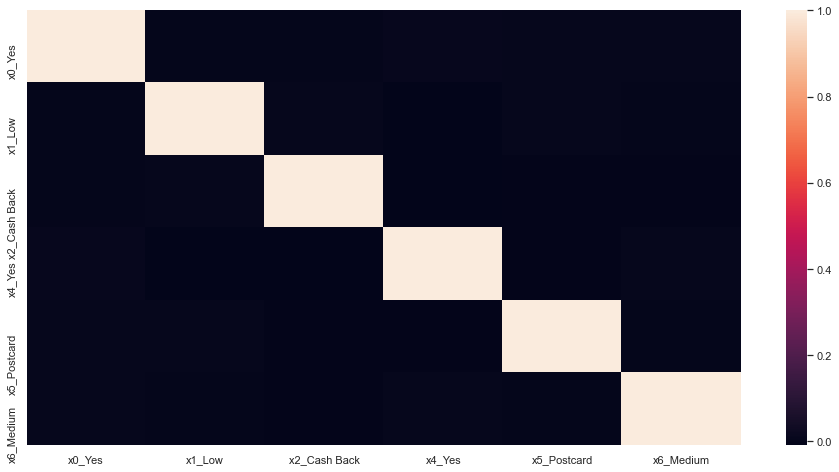

In [53]:
sns.heatmap(df_cat_enco.corr(), fmt='.1g')

In [54]:
frames = [df_cat_enco,df_numeric]
df_= pd.concat(frames,axis=1)

In [55]:
df_.columns

Index(['x0_Yes', 'x1_Low', 'x2_Cash Back', 'x4_Yes', 'x5_Postcard',
       'x6_Medium', '# Bank Accounts Open', '# Credit Cards Held',
       '# Homes Owned', 'Household Size', 'Q1 Balance', 'offer'],
      dtype='object')

In [56]:
df_.drop('x4_Yes', axis = 1, inplace = True)

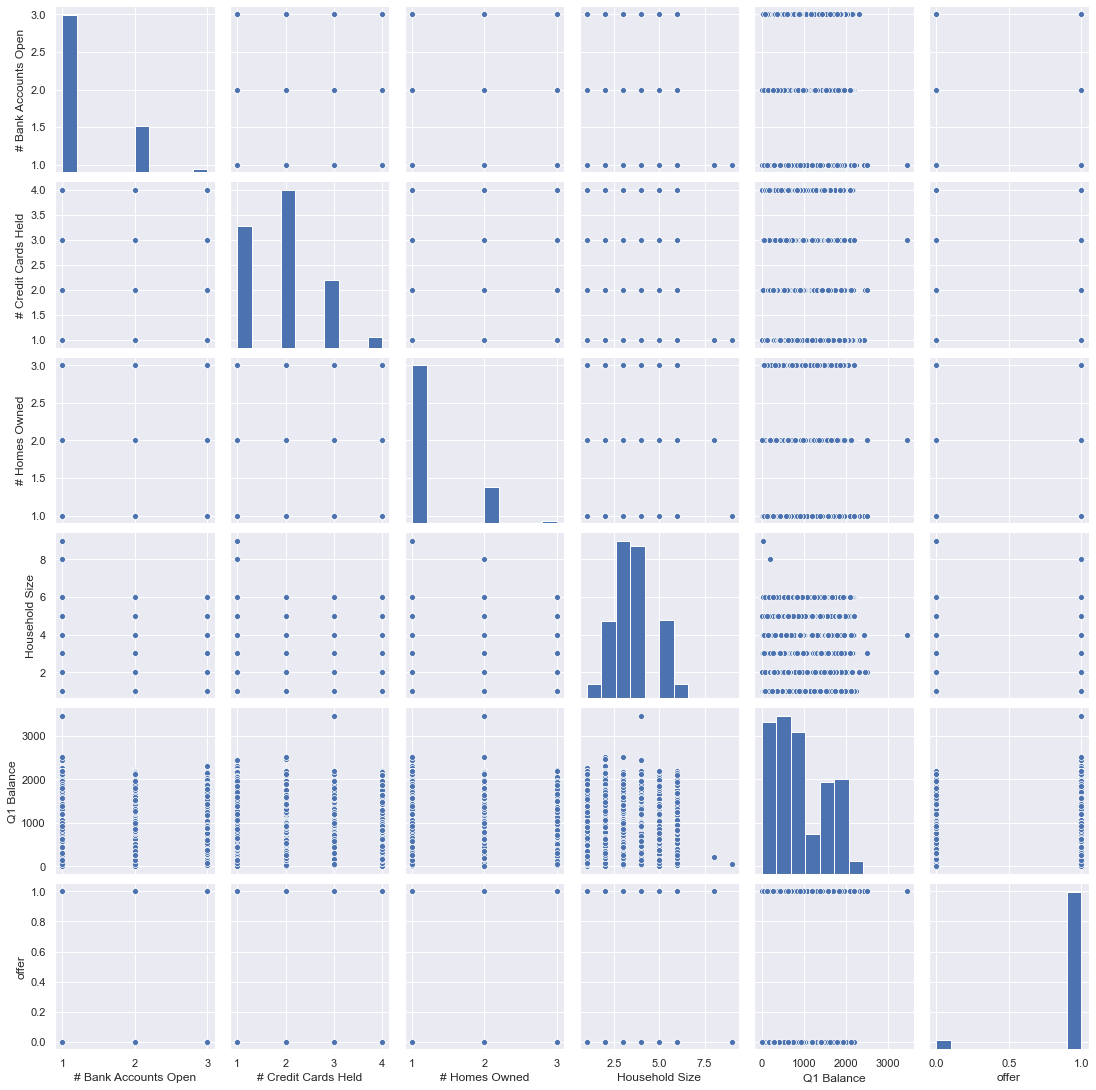

In [57]:
sns.pairplot(df_numeric)

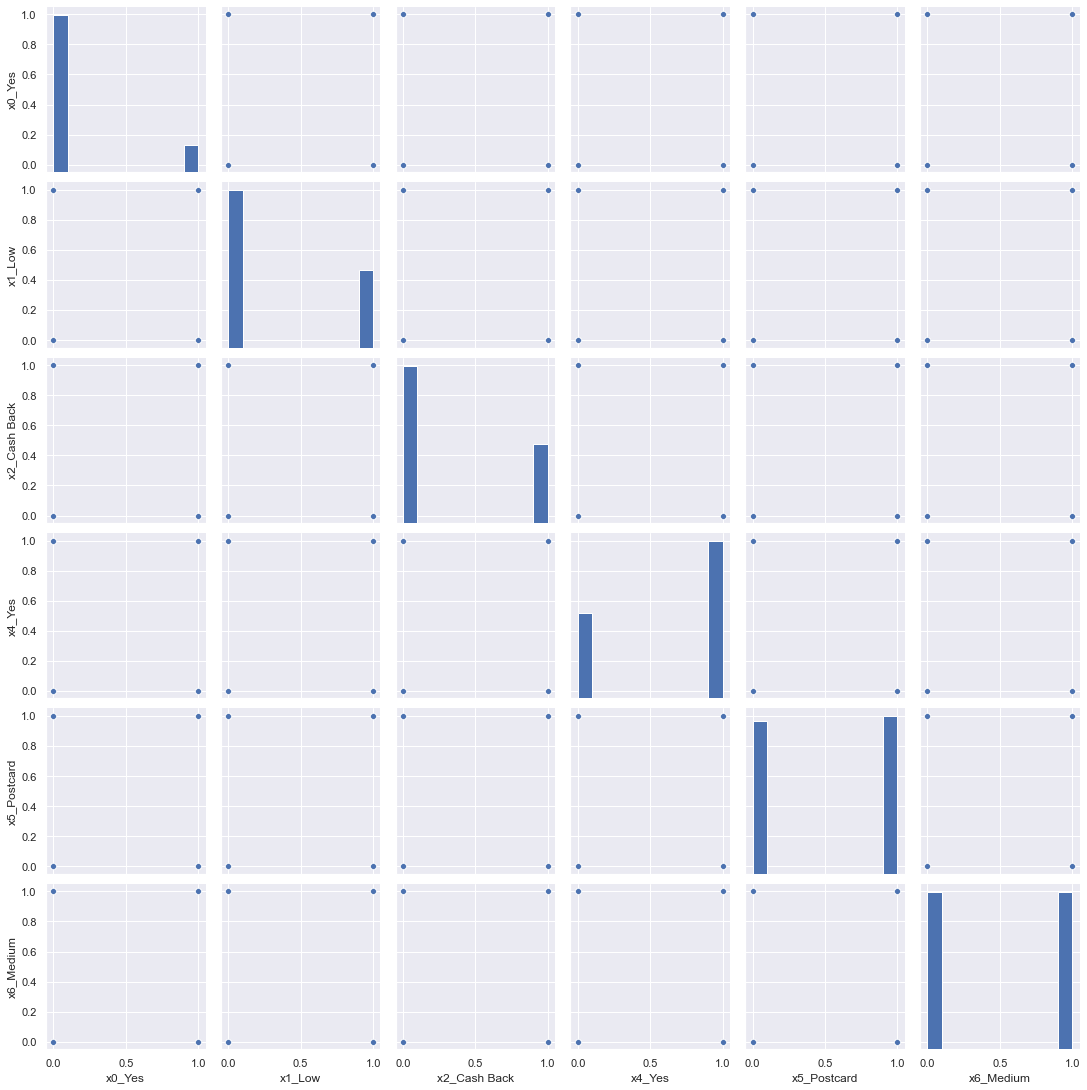

In [58]:
sns.pairplot(df_cat_enco)

In [59]:
#df_.drop(df_[['x4_Yes']],axis=1,inplace=True)

In [60]:
df_

,x0_Yes,x1_Low,x2_Cash Back,x5_Postcard,x6_Medium,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Q1 Balance,offer
0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,4.0,1669.0,1.0
1,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,5.0,39.0,1.0
2,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,2.0,367.0,1.0
3,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,4.0,1578.0,1.0
4,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,6.0,2140.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
17995,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,5.0,136.0,1.0
17996,0.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,3.0,984.0,1.0
17997,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,4.0,918.0,1.0
17998,0.0,0.0,1.0,0.0,1.0,1.0,4.0,2.0,2.0,626.0,1.0


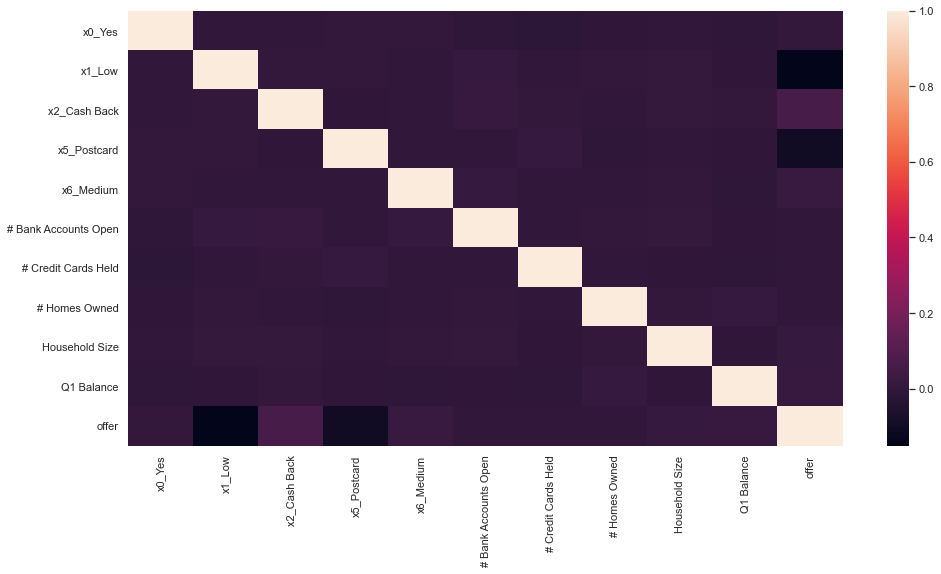

In [61]:
sns.heatmap(df_.corr(), fmt='.1g')

In [62]:
df_.dtypes

x0_Yes                  float64
x1_Low                  float64
x2_Cash Back            float64
x5_Postcard             float64
x6_Medium               float64
# Bank Accounts Open    float64
# Credit Cards Held     float64
# Homes Owned           float64
Household Size          float64
Q1 Balance              float64
offer                   float64
dtype: object

In [63]:
df_.columns.to_list()

['x0_Yes',
 'x1_Low',
 'x2_Cash Back',
 'x5_Postcard',
 'x6_Medium',
 '# Bank Accounts Open',
 '# Credit Cards Held',
 '# Homes Owned',
 'Household Size',
 'Q1 Balance',
 'offer']

In [64]:
df_.isna().sum()

x0_Yes                   0
x1_Low                   0
x2_Cash Back             0
x5_Postcard              0
x6_Medium                0
# Bank Accounts Open    24
# Credit Cards Held     24
# Homes Owned           24
Household Size          24
Q1 Balance              24
offer                   24
dtype: int64

In [65]:
df_.dropna(axis=0,inplace=True)

In [66]:
df_.isna().sum()

x0_Yes                  0
x1_Low                  0
x2_Cash Back            0
x5_Postcard             0
x6_Medium               0
# Bank Accounts Open    0
# Credit Cards Held     0
# Homes Owned           0
Household Size          0
Q1 Balance              0
offer                   0
dtype: int64

In [67]:
df_.columns

Index(['x0_Yes', 'x1_Low', 'x2_Cash Back', 'x5_Postcard', 'x6_Medium',
       '# Bank Accounts Open', '# Credit Cards Held', '# Homes Owned',
       'Household Size', 'Q1 Balance', 'offer'],
      dtype='object')

Now the model 

In [68]:
X=df_.iloc[:, :-1].values
y=df_.iloc[:, -1].values

In [69]:
X

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 4.000e+00,
        1.669e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 5.000e+00,
        3.900e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 2.000e+00,
        3.670e+02],
       ...,
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 4.000e+00,
        9.180e+02],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.000e+00, 2.000e+00,
        6.260e+02],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 3.000e+00,
        2.650e+02]])

In [70]:
y

array([1., 1., 1., ..., 1., 1., 1.])

In [71]:
# Clearly an unbalanced dataset
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0.0: 1021, 1.0: 16955}

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [73]:
print(X_train)


[[0.000e+00 0.000e+00 1.000e+00 ... 1.000e+00 4.000e+00 1.600e+02]
 [0.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 3.000e+00 1.537e+03]
 [0.000e+00 1.000e+00 0.000e+00 ... 1.000e+00 4.000e+00 5.250e+02]
 ...
 [0.000e+00 0.000e+00 1.000e+00 ... 1.000e+00 6.000e+00 5.810e+02]
 [0.000e+00 1.000e+00 0.000e+00 ... 1.000e+00 4.000e+00 4.300e+01]
 [0.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 3.000e+00 5.400e+02]]


In [74]:
print(X_test)


[[0.000e+00 0.000e+00 1.000e+00 ... 2.000e+00 3.000e+00 7.050e+02]
 [0.000e+00 0.000e+00 1.000e+00 ... 1.000e+00 4.000e+00 5.650e+02]
 [0.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 2.000e+00 8.550e+02]
 ...
 [0.000e+00 1.000e+00 0.000e+00 ... 1.000e+00 2.000e+00 3.140e+02]
 [0.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 2.000e+00 1.754e+03]
 [0.000e+00 1.000e+00 0.000e+00 ... 2.000e+00 2.000e+00 1.030e+02]]


In [75]:
print(y_train)


[1. 1. 0. ... 1. 1. 1.]


In [76]:
print(y_test)


[1. 1. 1. ... 1. 1. 1.]


## Feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [78]:
X_test

array([[-0.42175672, -0.70451217,  1.40365871, ...,  1.86830949,
        -0.4501535 , -0.33721006],
       [-0.42175672, -0.70451217,  1.40365871, ..., -0.47590163,
         0.44603219, -0.56263142],
       [-0.42175672, -0.70451217, -0.71242389, ..., -0.47590163,
        -1.34633919, -0.09568716],
       ...,
       [-0.42175672,  1.41942189, -0.71242389, ..., -0.47590163,
        -1.34633919, -0.96677974],
       [-0.42175672, -0.70451217, -0.71242389, ..., -0.47590163,
        -1.34633919,  1.35184006],
       [-0.42175672,  1.41942189, -0.71242389, ...,  1.86830949,
        -1.34633919, -1.30652194]])

## Training the K-NN model on the Training set

In [79]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


## Making the Confusion Matrix

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[   5  248]
 [  10 4231]]


0.9425901201602136

# Clear example of very bad performance with unbalanced data

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f' the mean absolute value for our model is',mae)
print(f' the mean square value for our model is',mse)
print(f' the r2 score for our model is',r2)

 the mean absolute value for our model is 0.05740987983978638
 the mean square value for our model is 0.05740987983978638
 the r2 score for our model is -0.08059755464489782


Text(0.5, 510.88, 'Predicted label')

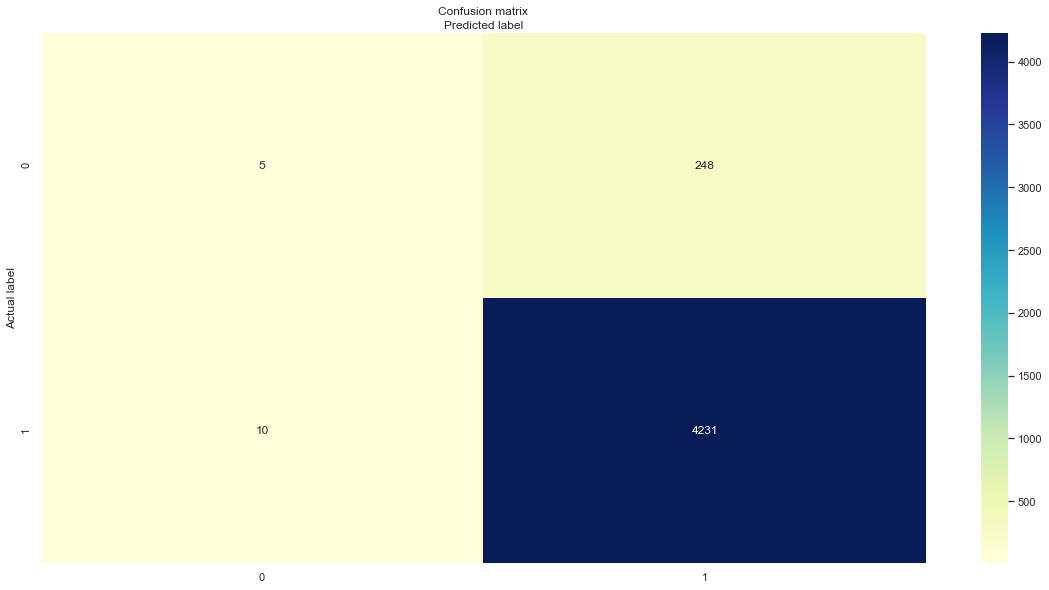

In [83]:
import seaborn as sns
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Training the Logistic Regression model on the Training set

In [84]:
from sklearn.linear_model import LogisticRegression
clas = LogisticRegression(random_state = 0)
clas.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [85]:
y_hat = clas.predict(X_test)
print(np.concatenate((y_hat.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


Text(0.5, 510.88, 'Predicted label')

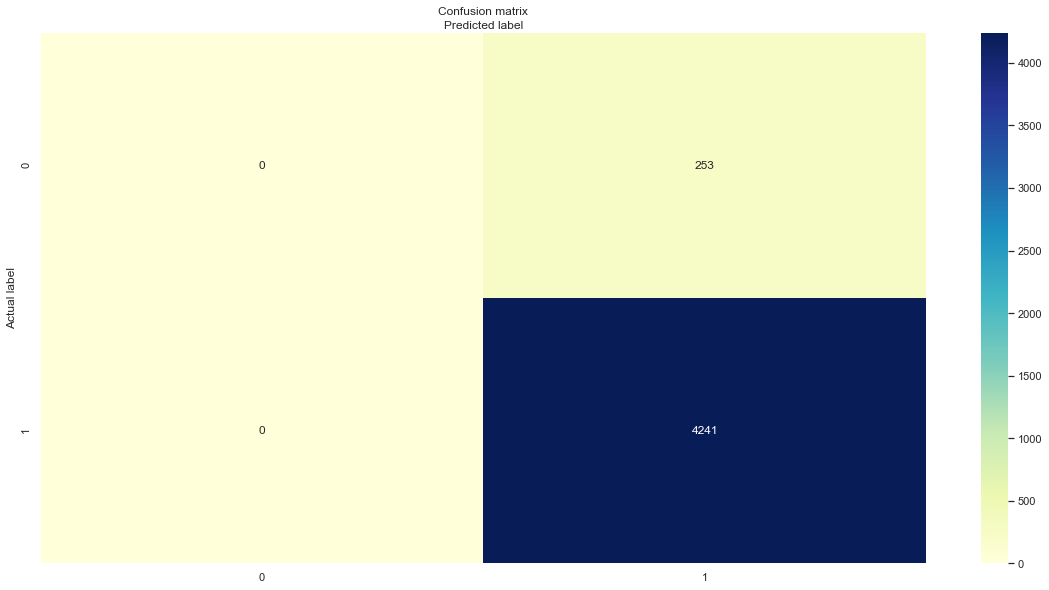

In [86]:
import seaborn as sns
cnf_matrix = confusion_matrix(y_test, y_hat)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_hat)
print(cm)
accuracy_score(y_test, y_hat)

[[   0  253]
 [   0 4241]]


0.9437027147307521

## Training the Decision Tree Classification model on the Training set

In [88]:
from sklearn.tree import DecisionTreeClassifier
classifi = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifi.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [89]:
y_pred = classifi.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [0. 1.]
 [1. 1.]
 [1. 1.]]


In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  28  225]
 [ 260 3981]]


0.8920783266577659

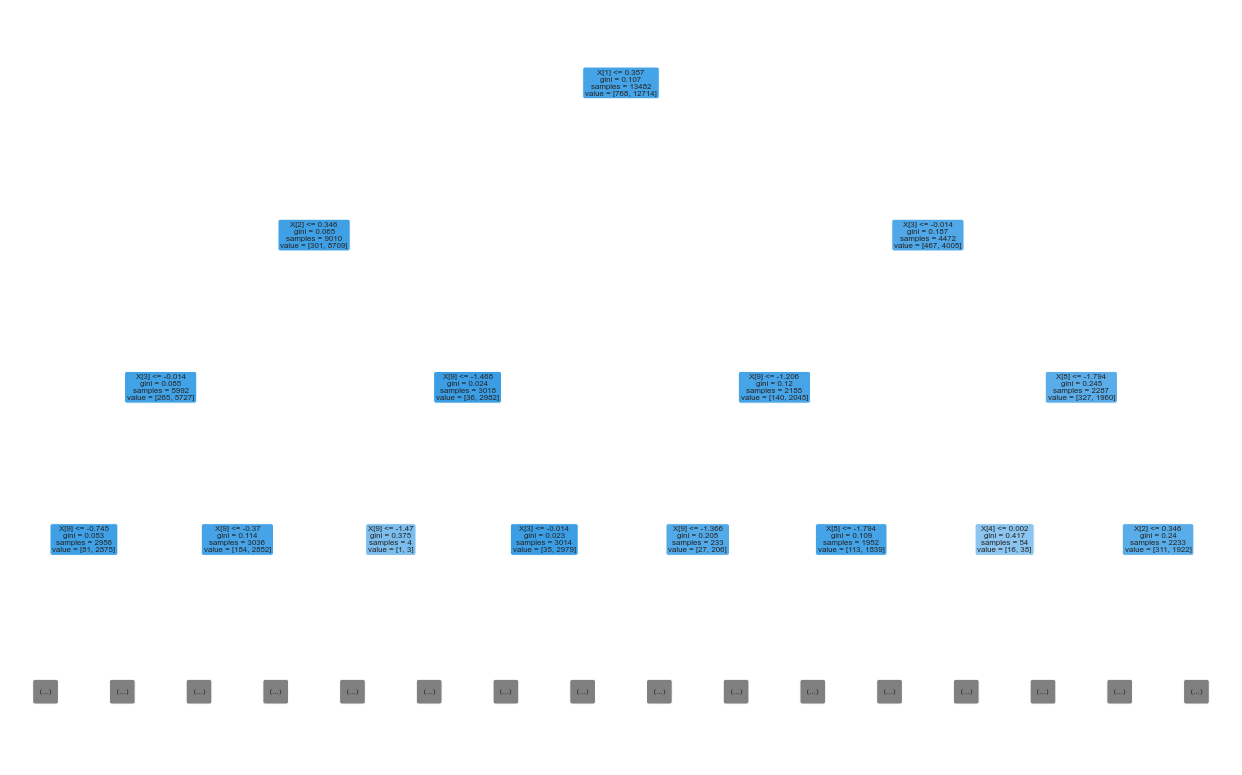

In [91]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=56).fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(22, 14))
tree.plot_tree(clf, max_depth = 3, rounded = True, filled = True)  
    
plt.show()
#This plot shows one, randomly selected tree from the Forest

## Training the Random Forest Classification model on the Training set

In [92]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [93]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  17  236]
 [ 120 4121]]


0.9207832665776591

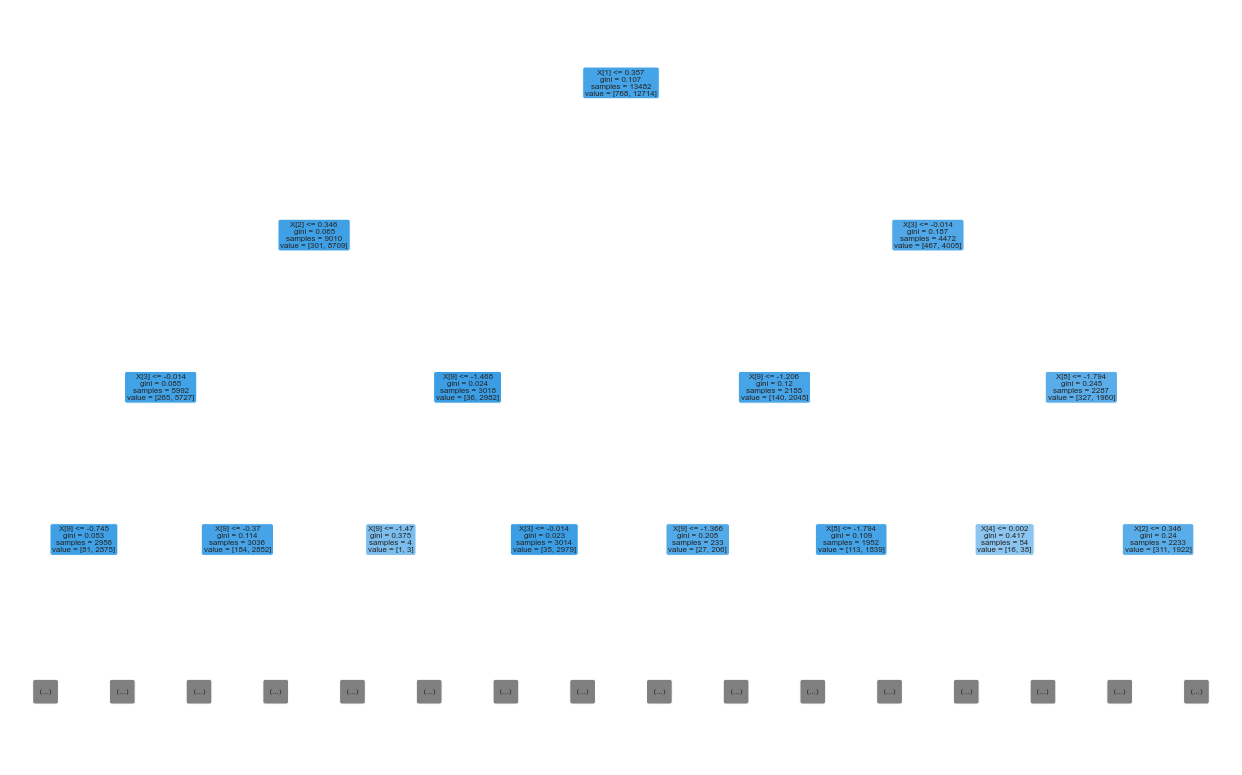

In [95]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(22, 14))
tree.plot_tree(clf, max_depth = 3, rounded = True, filled = True)  
    
plt.show()

## Visualising the Training set results

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [97]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


Now let's do oversampling

In [98]:

# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variablex_ros,
y_ros = ros.fit_resample(X,y)
y_ros

(array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 4.000e+00,
         1.669e+03],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 5.000e+00,
         3.900e+01],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 2.000e+00,
         3.670e+02],
        ...,
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 3.000e+00,
         2.240e+02],
        [0.000e+00, 1.000e+00, 0.000e+00, ..., 3.000e+00, 3.000e+00,
         1.854e+03],
        [1.000e+00, 1.000e+00, 0.000e+00, ..., 1.000e+00, 9.000e+00,
         4.400e+01]]),
 array([1., 1., 1., ..., 0., 0., 0.]))

In [99]:
y_ros[1]

array([1., 1., 1., ..., 0., 0., 0.])

In [100]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))


{0.0: 1021, 1.0: 16955}

In [101]:
unique1, counts1 = np.unique(y_ros[1], return_counts=True)
dict(zip(unique1, counts1))


{0.0: 16955, 1.0: 16955}

Training the models again with oversampled data

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [103]:
X_sampled = y_ros[0]
y_sampled = y_ros[1]

In [104]:
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_sampled, y_sampled, test_size = 0.35, random_state = 42)

In [105]:
def evaluate_model(train_X, train_y, test_X, test_y, model):
    ml_model = model
    ml_model.fit(train_X, train_y)
    
    predictions = ml_model.predict(test_X)
    acc = accuracy_score(test_y, predictions)
    
    print(f"Our model achieved an accuracy of {acc}")

In [106]:
evaluate_model(X_train_sampled, y_train_sampled, X_test_sampled, y_test_sampled, DecisionTreeClassifier())

Our model achieved an accuracy of 0.9613278287977083


In [107]:
evaluate_model(X_train_sampled, y_train_sampled, X_test_sampled, y_test_sampled, RandomForestClassifier())

Our model achieved an accuracy of 0.9706799224871514
